# Projet Data Exploration

## Etienne Aubry et Charles-Meldhine Madi Mnemoi

L'objectif de ce projet est d'étudier le jeu de données `Esperancevie.csv` qui regroupe des indicateurs sur l'espérance de vie de 196 pays.



## Sommaire 

- [Description des données](#Description-des-données)
- [Analyse univariée](#Analyse-univariée)
- [Analyses bivariées](#Analyses-bivariées)
    - [Quanti x Quanti](#Quanti-x-Quanti)
    - [Quali x Quanti](#Quali-x-Quanti)
    - [Quali x Quali](#Quali-x-Quali)
- [Analyse multivariée](#Analyse-multivariée)

Commençons par charger le jeu de données et les packages nécessaires :

In [1]:
import numpy as np # Manipulation de matrices
import pandas as pd # Manipulation de tableaux de données
import matplotlib.pyplot as plt # Création de graphiques
import seaborn as sns # Création de graphiques de façon plus simple
from prince import PCA # Analyse en composantes principales

from utils import display_side_by_side # Fonction pour afficher plusieurs tableaux côte à côte

sns.set()

dataset = pd.read_csv(
    filepath_or_buffer="https://raw.githubusercontent.com/cmnemoi/Projet_Data_Exploration/main/Esperancevie.csv",
    index_col="PAYS", # On définit la colonne Pays comme index
    decimal=",", # On définit la virgule comme séparateur décimal
    sep=";", # On définit le point-virgule comme séparateur de colonne
    encoding = "ISO-8859-1"
)

# <a id="Description-des-données"></a> Description des données

In [27]:
print("Il y a", dataset.shape[0], "pays et", dataset.shape[1], "variables dans le dataset.")

Il y a 196 pays et 7 variables dans le dataset.


In [20]:
dataset.head()

,TNAT,TMORT,EV,T65,NBENF,TCR,CONT
PAYS,,,,,,,
Afghanistan,45.49,18.60,44.97,2.254847,6.35,3.33,ASIE
AfriquedSud,21.22,15.24,52.28,4.737313,2.45,0.57,AFRIQUE
Albanie,15.02,6.52,77.02,9.907497,1.85,0.51,EUROPE
Algerie,20.48,4.91,73.13,4.690466,2.30,1.48,AFRIQUE
Allemagne,7.95,10.77,80.33,20.670035,1.33,-0.16,EUROPE


Les variables sont les suivantes :
 - `TNAT` : variable quantitative qui représente le taux de natalité pour 1000 habitants
 - `TMORT` : variable quantitative qui représente le taux de mortalité pour 1000 habitants
 - `EV` : variable quantitative qui représente l'espérance de vie en années
 - `T65` : variable quantitative qui représente le taux de personnes de plus de 65 ans pour 100 habitants
 - `NBENF` : variable quantitative qui représente le nombre d'enfants par femme
 - `TCR` : variable quantitative qui représente le taux de croissance de la population pour 1000 habitants
 - `CONT` : variable qualitative qui représente le continent

Pour varier les plaisirs, codons le nombre d'enfants par femme `NBENF` comme variable qualitative avec les modalités suivantes :
 - `NBENF` < 1.85 : `Faible`
 - 1.85 <= `NBENF` < 3.6 : `Moyen`
 - `NBENF` >= 3.6 : `Elevé`

In [2]:
dataset.NBENF = dataset.NBENF.apply(
    lambda nb_enfants: "Faible" if nb_enfants < 1.85 else "Moyen" if nb_enfants < 3.6 else "Elevé"
)

# Indiquons à Pandas que ces variables sont catégorielles
dataset.NBENF = dataset.NBENF.astype("category")
dataset.CONT = dataset.CONT.astype("category")

In [22]:
dataset.dtypes

TNAT      float64
TMORT     float64
EV        float64
T65       float64
NBENF    category
TCR       float64
CONT     category
dtype: object

In [3]:
quantitative_variables = dataset.select_dtypes(include=["float64", "int64"]).columns
qualitative_variables = dataset.select_dtypes(include=["category"]).columns

# <a id="Analyse-univariée"></a> Analyse univariée

Commençons par un résumé des données de chaque variable :

In [24]:
display_side_by_side(*[pd.DataFrame(dataset[variable].describe()).T for variable in dataset.columns])

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 TNAT 
 196.0 
 21.373061 
 10.262112 
 7.7 
 12.555 
 19.38 
 28.1675 
 51.99 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 TMORT 
 196.0 
 8.529286 
 3.528179 
 1.52 
 5.935 
 7.79 
 10.375 
 18.6 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 EV 
 196.0 
 69.701429 
 9.87159 
 44.97 
 64.1225 
 72.605 
 76.855 
 83.37 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 T65 
 196.0 
 7.764565 
 5.278277 
 1.044821 
 3.55445 
 5.787767 
 12.188295 
 23.275033 
 
 
 
 
 
 
 count 
 unique 
 top 
 freq 
 
 
 
 
 NBENF 
 196 
 3 
 Moyen 
 95 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 TCR 
 196.0 
 1.273827 
 1.004232 
 -0.8 
 0.42 
 1.195 
 2.0725 
 3.78 
 
 
 
 
 
 
 count 
 unique 
 top 
 freq 
 
 
 
 
 CONT 
 196 
 6 
 AFRIQUE 
 55

Ainsi que des graphiques de distribution de chaque variable :

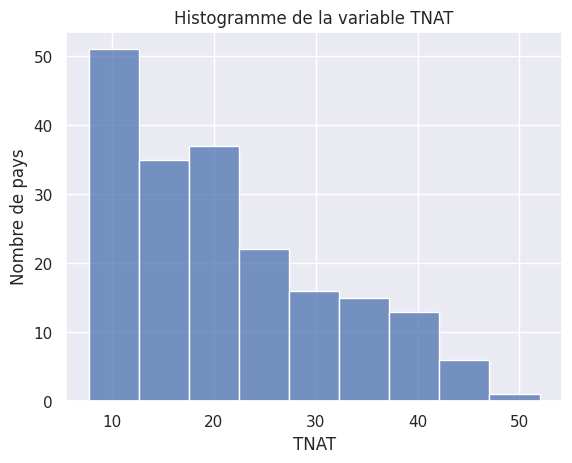

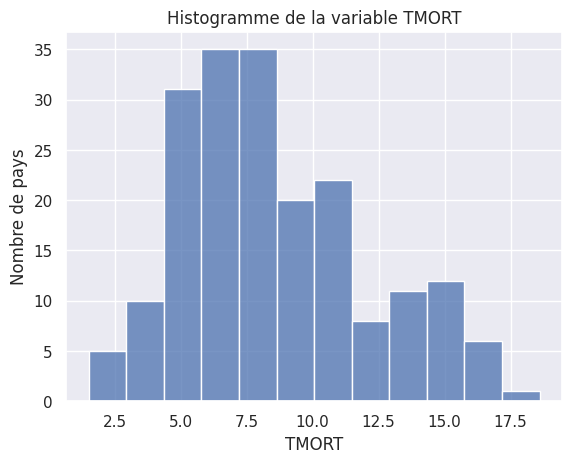

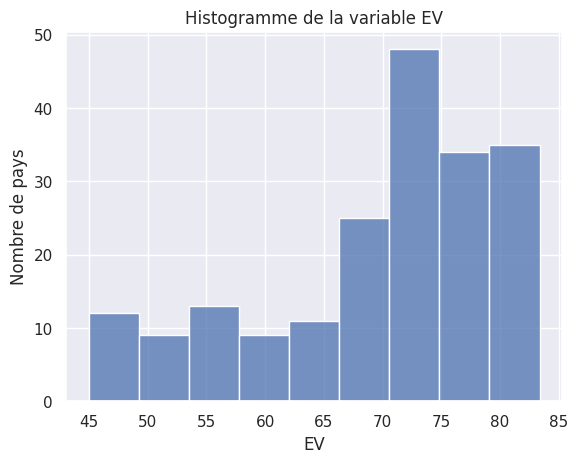

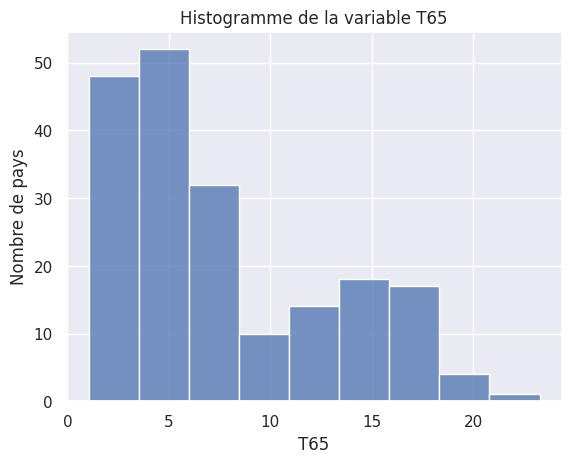

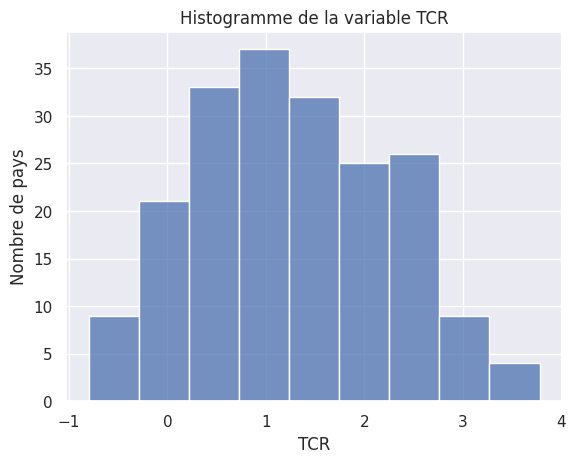

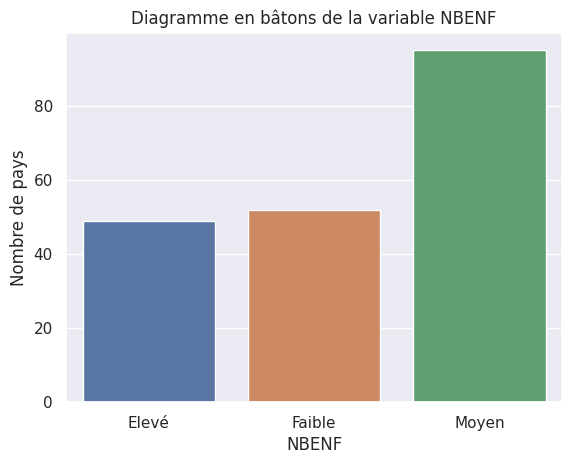

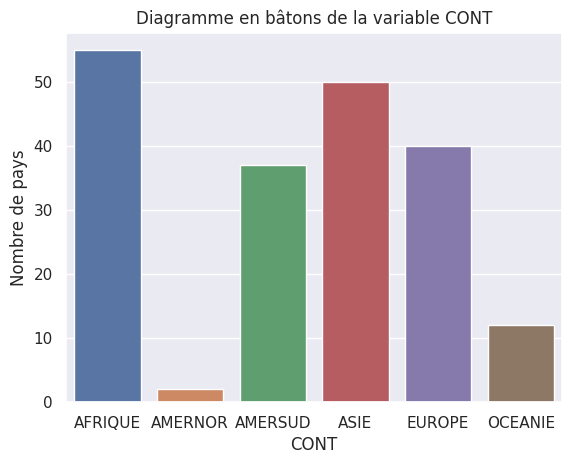

In [25]:
for variable in quantitative_variables:
    sns.histplot(dataset[variable])
    plt.title(f"Histogramme de la variable {variable}")
    plt.xlabel(variable)
    plt.ylabel("Nombre de pays")
    plt.show()

for variable in qualitative_variables:
    sns.countplot(data = dataset, x = variable)
    plt.title(f"Diagramme en bâtons de la variable {variable}")
    plt.xlabel(variable)
    plt.ylabel("Nombre de pays")
    plt.show()

Quelques observations :
- Le taux de natalité `TNAT` moyen est de 21.3 pour mille habitants, avec un écart-type de 10.26, environ 50% de la moyenne. Cela signifie que les taux de natalité **varient beaucoup d'un pays à l'autre**, comme on peut le voir sur l'histogramme.
La médiane est de 19.5 pour mille, ce qui est légèrement inférieur à la moyenne (la distribution est légèrement asymétrique à droite). Cela signifie que **la majorité des pays** ont un taux de natalité inférieur à la moyenne, mais qu'**une petite quantité de pays** a un taux de natalité **très élevé** (maximum de 51.99 pour mille).


- On observe une asymétrie similaire pour la plupart des variables quantitatives, avec une moyenne légèrement supérieure à la médiane, sauf pour `EV` qui est asymétrique à gauche : cela siginifie qu'**une majorité des pays** ont une espérance de vie supérieure à 71.5 ans comme l'indique la médiane, mais qu'**une petite quantité de pays** a une espérance de vie **très faible** (minimum de 44.97 ans), ce qui tire la moyenne vers le bas.

- Le taux de croissance de la population `TCR` est la seule à avoir une distribution symétrique (moyenne très proche de la médiane), ce qui signifie qu'il y a autant de pays avec un taux de croissance **de part et d'autres de la moyenne**.

- Il y a très peu de pays d'Amérique du Nord et d'Océanie dans les données d'après le diagramme en bâtons, tandis que les pays africains sont les plus représentés.

# <a id="Analyses-bivariées"></a> Analyses bivariées

## <a id="Quanti-x-Quanti"></a> Quanti x Quanti

L'indicateur le plus adapté pour comparer deux variables quantitatives est le coefficient de corrélation de Pearson. Il est calculé comme suit :

$$
\rho_{X,Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2}\sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}
$$

où $X$ et $Y$ sont les deux variables quantitatives, $\bar{X}$ et $\bar{Y}$ leurs moyennes respectives, et $n$ le nombre d'observations.

Ce coefficient permet d'estimer le lien **linéaire** entre $X$ et $Y$.

On peut calculer ce coefficient pour chaque paire de variables quantitatives à l'aide de la fonction `dataset.corr()` et afficher le résultat sous forme de matrice de corrélation à l'aide de la fonction `sns.heatmap()` :

Text(0.5, 1.0, 'Matrice de corrélation entre les variables quantitatives')

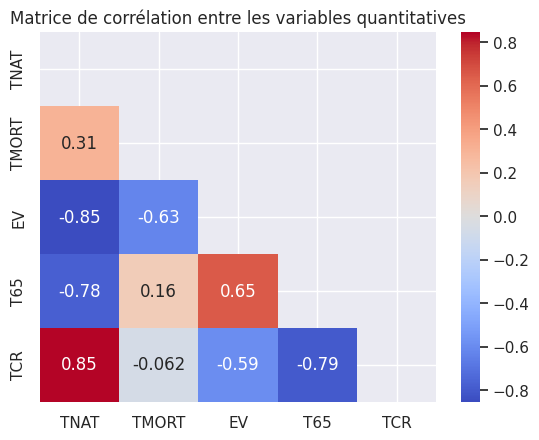

In [28]:
correlation_matrix = dataset.corr(method="pearson", numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Masque pour ne pas afficher la partie triangulaire supérieure de la matrice de corrélation

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask)
plt.title("Matrice de corrélation entre les variables quantitatives")

On observe par exemple pour le taux de natalité `TNAT` :
 - une forte corrélation positive avec le taux de croissance de la population `TCR` (0.85), ce qui signifie que les pays avec un taux de natalité élevé est proportionnel à avoir un taux de croissance de la population élevé également.
 - une forte corrélation négative avec l'esprance de vie `EV` (-0.85) et le taux de personnes de plus de 65 ans `T65` (-0.78) : cela signifie que les pays avec un taux de natalité élevé est inversement proportionnel à avoir une espérance de vie et un taux de personnes de plus de 65 ans faibles.
 - une corrélation positive moyenne avec le taux de mortalité `TMORT` (0.31) : cela signifie que les pays avec un taux de natalité élevé ont tendance à avoir un taux de mortalité élevé également, mais pas de façon systématique.

Un autre indicateur permettant de mesurer le lien entre deux variables quantitatives est le $R^2$ (ou coefficient de détermination). Il est calculé comme suit :

$$
R^2 = \rho_{X,Y}^2
$$

où $\rho_{X,Y}$ est le coefficient de corrélation de Pearson entre $X$ et $Y$.

Le $R^2$ permet d'estimer la variance expliquée par la relation linéaire entre $X$ et $Y$.

Nous pouvons également afficher les nuages de points pour chaque paire de variables quantitatives et la droite de régression linéaire correspondante :

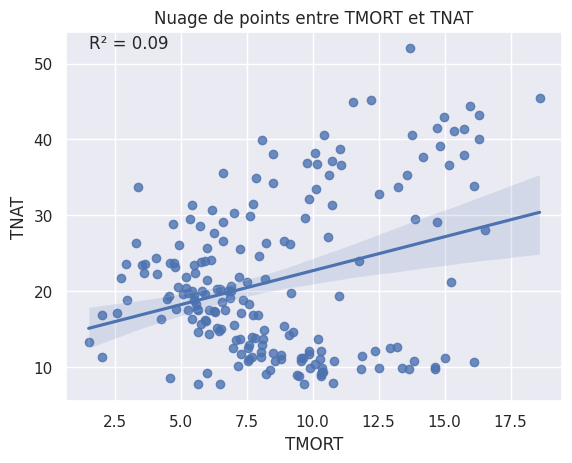

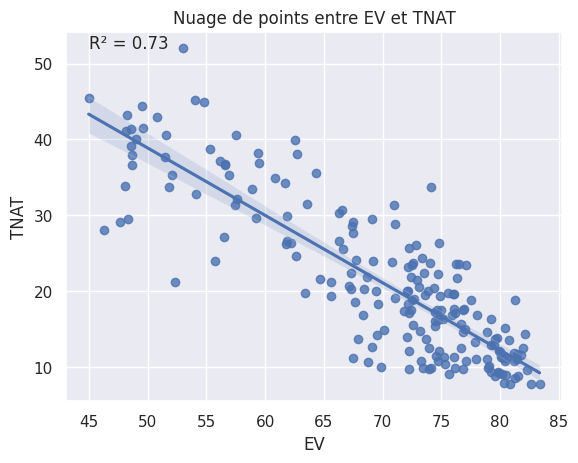

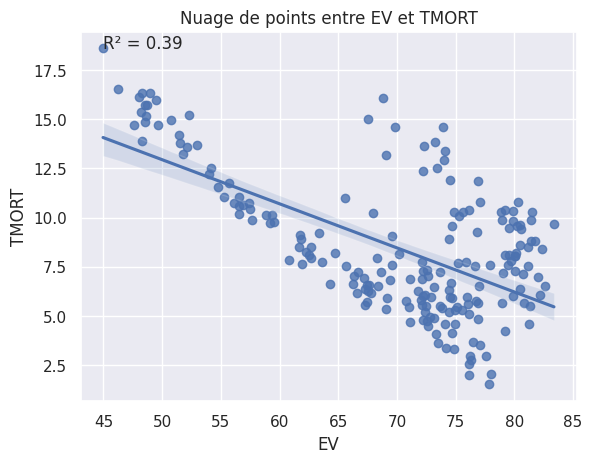

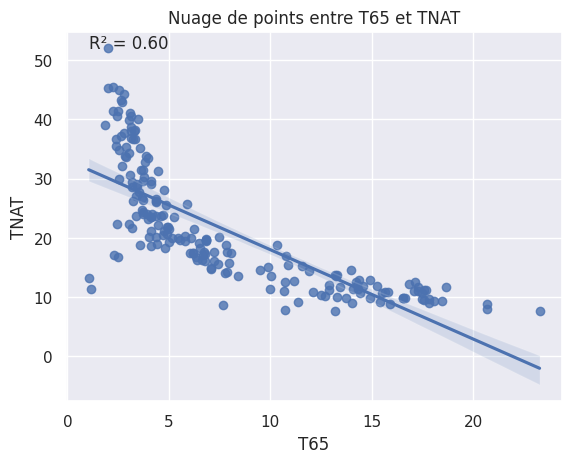

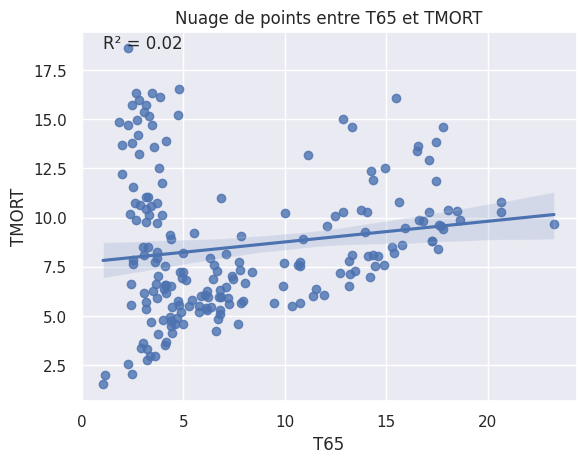

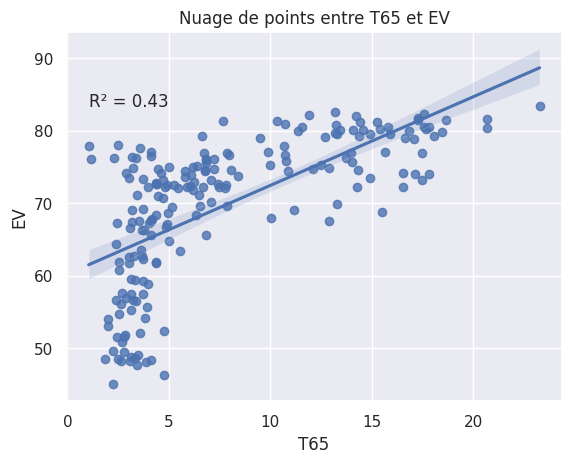

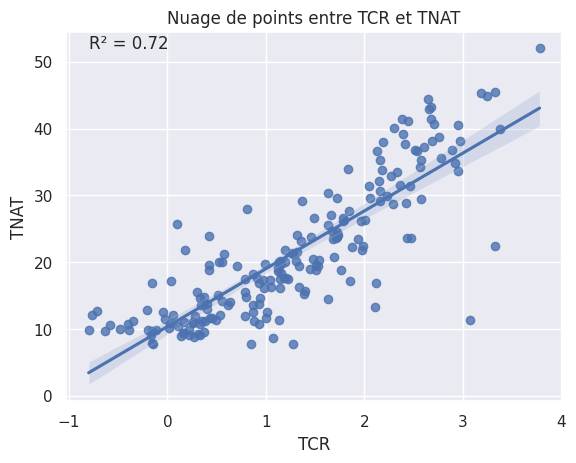

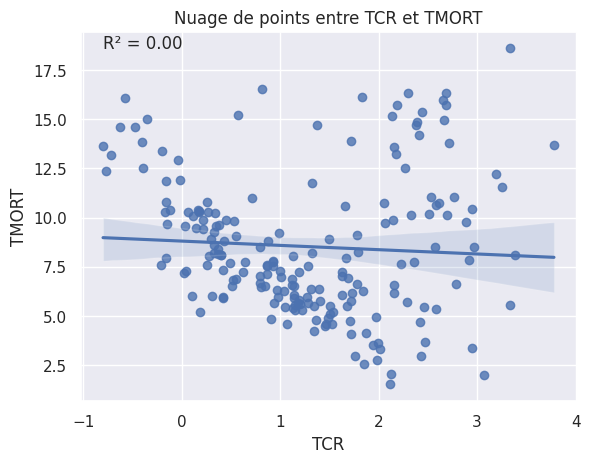

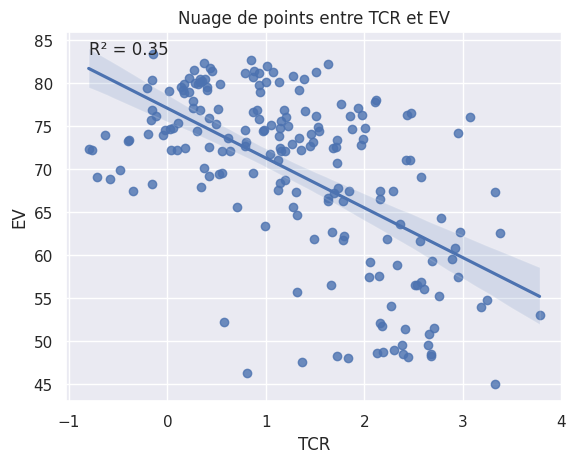

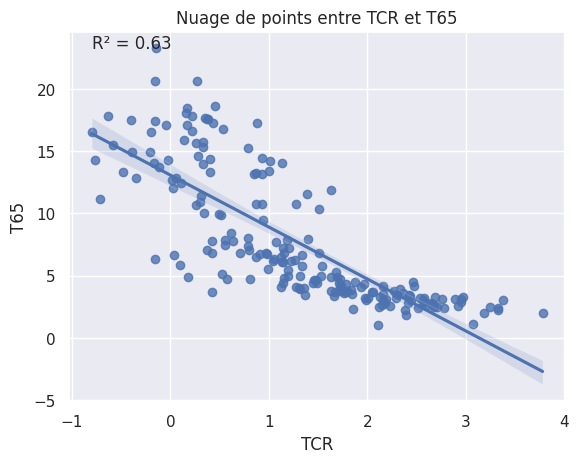

In [38]:
from scipy.stats import linregress # Régression linéaire

for x in quantitative_variables:
    for y in quantitative_variables[:quantitative_variables.get_loc(x)]:
        if x != y:
            linear_regression = linregress(dataset[x], dataset[y])
            sns.regplot(data=dataset, x=x, y=y)
            plt.title(f"Nuage de points entre {x} et {y}")
            # On affiche le R²
            plt.text(
                x=dataset[x].min(),
                y=dataset[y].max(),
                s=f"R² = {linear_regression.rvalue**2:.2f}",
                fontsize=12
            )
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()

En guise d'example, on observe que :
- le taux de natalité `TNAT` est proportionnel au taux de croissance de la population `TCR` : plus le taux de natalité est élevé, plus le taux de croissance de la population est élevé également. D'après le $R²$ Le taux de natalité explique 72% de la variance du taux de croissance de la population.
- il ne semble pas y avoir de relation entre le taux de mortaalite `TMORT` et le taux de croissance `TCR` : le $R²$ est nul, ce qui signifie que le taux de mortalité n'explique pas la variance du taux de croissance de la population. Les points sont répartis de façon aléatoire autour de la droite de régression linéaire.

## <a id="Quanti-x-Quanti"></a> Quanti x Quanti

Le graphique le plus adapté pour comparer une variable quantitative et une variable qualitative est la boîte à moustaches (ou boxplot). Elle permet de visualiser la distribution de la variable quantitative selon les modalités de la variable qualitative.

On peut afficher les boxplots pour chaque paire de variables à l'aide de la fonction `sns.boxplot()` :

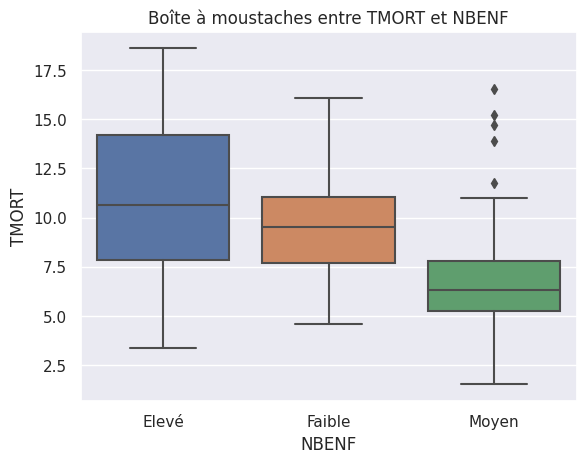

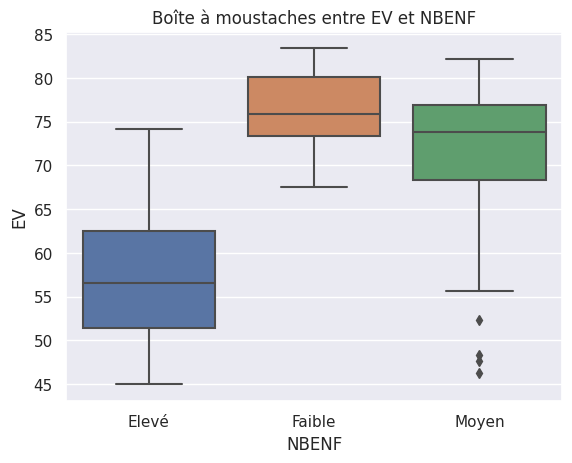

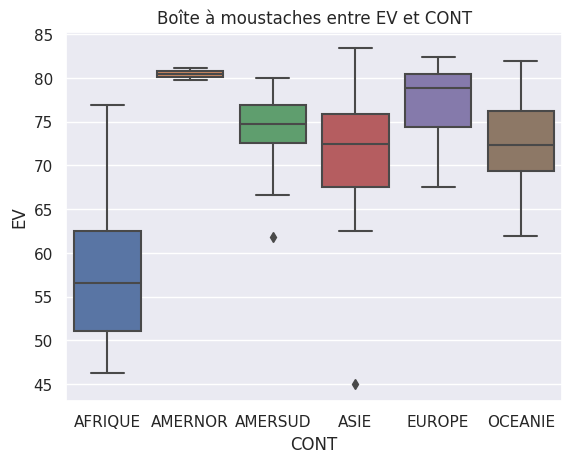

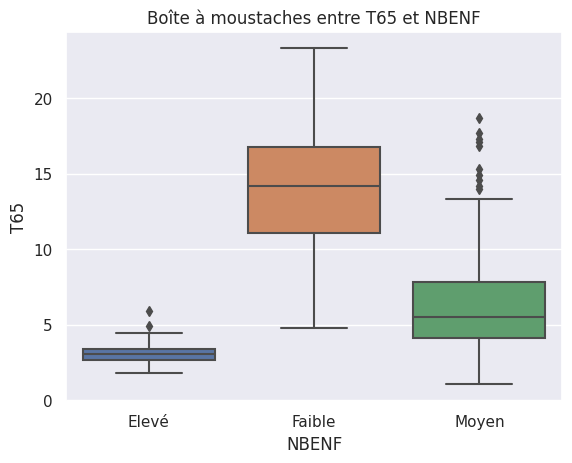

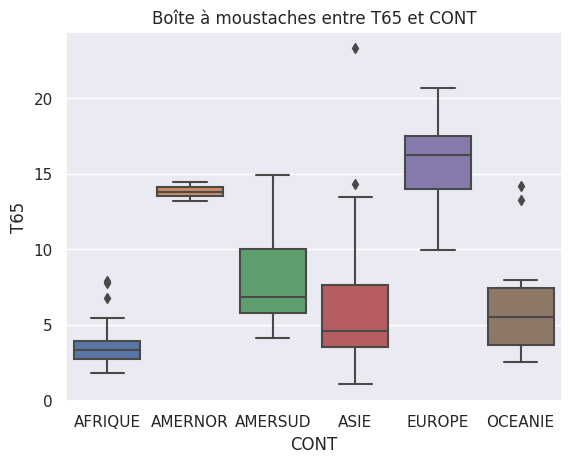

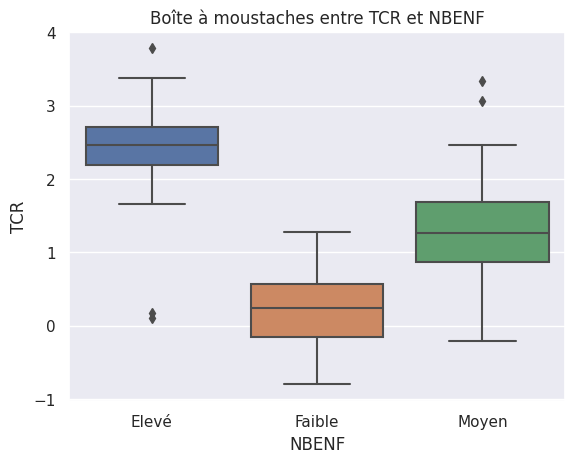

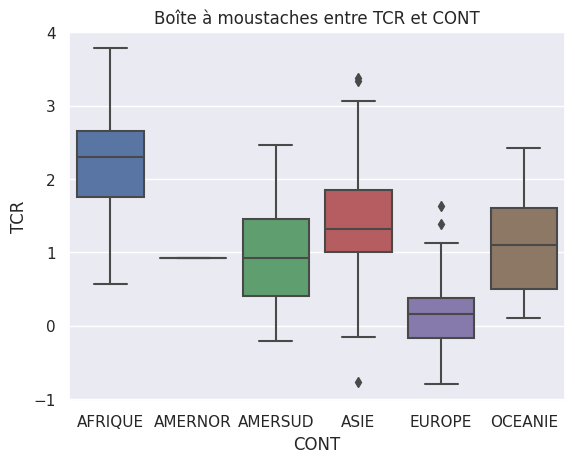

In [40]:
for x in quantitative_variables:
    for y in qualitative_variables[:quantitative_variables.get_loc(x)]:
        sns.boxplot(data=dataset, x=y, y=x)
        plt.title(f"Boîte à moustaches entre {x} et {y}")
        plt.xlabel(y)
        plt.ylabel(x)
        plt.show()

Pour le plus notable, on observe que :
- les pays africains ont une espérance de vie plus faible que les autres pays, avec une médiane vers les 55.5 ans tandis que les autres pays ont une médiane supérieure à 70 ans. Leur espérance de vie est également plus variable que celle des autres pays.
- les pays africains ont un taux de natalité et de croissance de la population plus élevés que les autres pays. On observe également que les pays européens sont plus en dessous des autres pays : ils sont les seuls à avoir des pays avec un taux de croissance de la population négatif.

Tout ceci s'explique bien par le phénomène de [transition démographique](https://fr.wikipedia.org/wiki/Transition_d%C3%A9mographique) :
 - les pays africains sont au tout début de la transition démographique, avec un taux de natalité et de croissance de la population élevé.
 - les pays des autres continents (hors Europe) sont en fin de transition démographique, avec un taux de natalité et de croissance de la population qui se stabilise.
- les pays européens ont terminé leur transition il y a bien longtemps, ils sont même en face de déclin démographique, avec un taux de croissance de la population négatif.


## <a id="Quanti-x-Quanti"></a> Quanti x Quanti

L'indicateur le plus adapté pour comparer deux variables qualitatives est la distance du chi-deux. Elle est calculée comme suit :

$$
\chi^2 = \sum_{i=1}^{n}\sum_{j=1}^{m}\frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

où $O_{ij}$ est le nombre d'observations dans la cellule $i$ de la variable $X$ et $j$ de la variable $Y$, et $E_{ij}$ est le nombre d'observations attendues dans cette cellule.

Cette distance permet d'estimer le lien entre les deux variables qualitatives.

On peut se faire une idée du lien entre deux variables qualitatives à l'aide de tableaux de contingence :

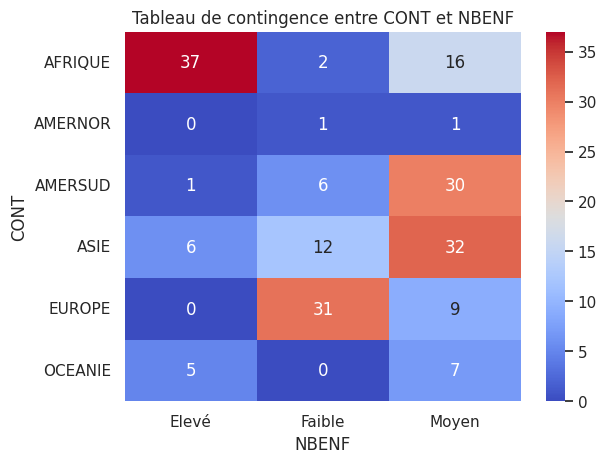

In [41]:
for x in qualitative_variables:
    for y in qualitative_variables[:qualitative_variables.get_loc(x)]:
        if x != y:
            contingency_table = pd.crosstab(dataset[x], dataset[y])
            sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
            plt.title(f"Tableau de contingence entre {x} et {y}")
            plt.xlabel(y)
            plt.ylabel(x)
            plt.show()

On observe que :
 - le contient africain est celui avec le plus de pays avec un nombre d'enfants par femme `NBENF` élevé
 - le continent européen est celui avec le plus de pays avec un nombre d'enfants par femme `NBENF` faible
 - les autres continents ont en majorité des pays avec un nombre d'enfants par femme `NBENF` moyen

On voit bien que le nombre d'enfants par femme `NBENF` est lié au continent, conformément à la [transition démographique](https://fr.wikipedia.org/wiki/Transition_d%C3%A9mographique).

On peut confirmer ce lien à l'aide d'un test du $\chi^2$ :

Hypothèse $H_0$ : le nombre d'enfants par femme `NBENF` est indépendant du continent

Hypothèse $H_1$ : le nombre d'enfants par femme `NBENF` est dépendant du continent

On rejette $H_0$ si la p-value est inférieure à 0.05 (on a donc un risque $\alpha = 5%$ de chances de rejeter $H_0$ à tort).

In [48]:
from scipy.stats import chi2_contingency # Test du χ²

for x in qualitative_variables:
    for y in qualitative_variables[:qualitative_variables.get_loc(x)]:
        if x != y:
            contingency_table = pd.crosstab(dataset[x], dataset[y])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            print(f"Test du χ² entre {x} et {y} :")
            print(f"p-value = {p_value:.0f}")
            if p_value < 0.05:
                print(f"La p-value est inférieure à 0.05, on rejette donc H0 : les variables {x} et {y} sont indépendantes.")
            else:
                print(f"La p-value n'est pas inférieure à 0.05, on ne peut donc pas rejeter H0 : les variables {x} et {y} sont indépendantes.")
            print()

Test du χ² entre CONT et NBENF :
p-value = 0
La p-value est inférieure à 0.05, on rejette donc H0 : les variables CONT et NBENF sont indépendantes.



# <a id="Analyse-multivariée"></a> Analyse multivariée

Pour visualiser le lien entre nos différentes variables **quantitatives** en même temps, on peut utiliser une Analyse en Composantes Principales (ACP). 

Il s'agit une méthode statistique qui permet de représenter nos données dans un espace de dimension inférieure (typiquement en deux dimensions pour la visualisation) à celle des données initiales qui maximise la variance des données (il s'agit d'un changement de base, où les éléments de la nouvelle base sont appelés les composantes principales).

In [8]:
pca = PCA(
    rescale_with_mean=True, # on centre les données
    rescale_with_std=True, # on réduit les données
    copy=True,
    check_input=True,
    engine="auto",
    random_state=42
)

pca = pca.fit(dataset[quantitative_variables])

In [10]:
two_dimensions_inertia = pca.explained_inertia_[:2].sum()
print(f"La représentation des individus sur les deux premières composantes principales explique {two_dimensions_inertia*100:.2f}% de la variance.")

La représentation des individus sur les deux premières composantes principales explique 93.64% de la variance.


On voit que la représentation des données à l'aide des deux premières composantes principales conserve la majorité de la variance des données, la représentation est donc pertinente.

Pour permettre d'interpréter les composantes principales, on peut afficher leurs coefficients de corrélation avec les variables initiales :

Text(0.5, 1.0, 'Matrice de corrélation entre les variables quantitatives et les composantes principales')

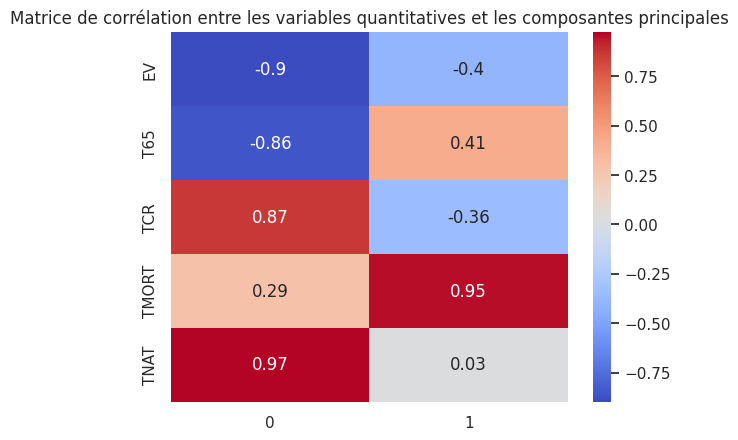

In [16]:
sns.heatmap(
    pca.column_correlations(dataset[quantitative_variables]), 
    annot=True, 
    cmap="coolwarm", 
    )
plt.title("Matrice de corrélation entre les variables quantitatives et les composantes principales")

On voit que :
- la première composante principale `0` est fortement **corrélée positivement** avec le taux de natalité `TNAT` et le taux de croissance de la population `TCR`, alors qu'elle est fortement **corrélée négativement** avec le taux de personnes de plus de 65 ans `T65` et l'espérance de vie `EV`.
Cela signifie que les pays qui auront une **coordonnée positive** sur la première composante principale `0` (= le premier axe) auront un taux de natalité et de croissance de la population élevé, mais une espérance de vie et un taux de personnes de plus de 65 ans faible.

- la deuxième composante principale est **fortement corrélée positivement** avec le taux de mortalité `TMORT`, **moyennement corrélée négativement** avec l'espérance de vie `EV` et le taux de croissance de la population `TCR`, et **moyennement corrélée positivement** avec le taux de personnes de plus de 65 ans `T65`.
Cela signifie que les pays qui auront une **coordonnée positive** sur la deuxième composante principale auront un taux de mortalité élevée.


On peut maintenant représenter les données dans le nouvel espace et interpréter le résultat :

<Axes: title={'center': 'Row principal coordinates'}, xlabel='Component 0 (66.40% inertia)', ylabel='Component 1 (27.24% inertia)'>

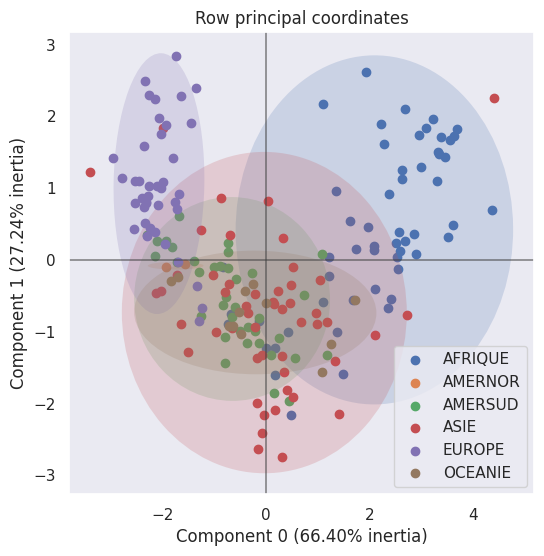

In [9]:
pca.plot_row_coordinates(
    X=dataset[quantitative_variables],
    x_component=0,
    y_component=1,
    color_labels=dataset.CONT,
    show_points=True
)

On observe que :
- les **pays africains** sont à droite de la représentation, ils ont une coordonnée positive sur la première composante principale `0`. Cela signifie qu'ils ont un taux de natalité et de croissance de la population **élevé**, mais une espérance de vie et un taux de personnes de plus de 65 ans faible. A l'opposé sur cet axe, on a les **pays européens** qui ont donc un taux de natalité et de croissance de la population **faible**, mais une espérance de vie et un taux de personnes de plus de 65 ans élevé.
- on observe que les pays africains et européens ont une coordonnée positive sur la deuxième composante principale. Cela signifie qu'ils ont un taux de mortalité **élevé**. Pour les pays européens cela peut s'expliquer par le fait qu'ils ont une population plus vieille et donc proportionnellement plus de personnes à risque de décès.